<a href="https://colab.research.google.com/github/dclark18/ML2_TransferLearning/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [223]:
pip install emnist

In [224]:
from __future__ import print_function
import datetime
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,  Conv2D, MaxPooling2D
from keras import backend as K

In [225]:
from emnist import extract_test_samples

In [226]:
images, labels = extract_test_samples('digits')

In [227]:
images.shape

(40000, 28, 28)

In [228]:
now = datetime.datetime.now
batch_size = 128
num_classes = 15
epochs = 5
img_rows, img_cols = 28, 28
filters = 32
pool_size = 2
kernel_size = 3
if K.image_data_format() == 'channels_first':
    input_shape = (1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1)


In [229]:
def train_model(model, train, test, num_classes):
    x_train = train[0].reshape((train[0].shape[0],) + input_shape)
    x_test = test[0].reshape((test[0].shape[0],) + input_shape)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')
    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(train[1], num_classes)
    y_test = keras.utils.to_categorical(test[1], num_classes)
    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])
    t = now()
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
    print('Training time: %s' % (now() - t))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

In [230]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
(x_train2, y_train2) = extract_test_samples('digits')

In [183]:
y_train2

array([0, 9, 7, ..., 3, 7, 4], dtype=uint8)

In [184]:
feature_layers = [
    Conv2D(filters, kernel_size,
           padding='valid',
           input_shape=input_shape),
    Activation('relu'),
    Conv2D(filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=pool_size),
    Dropout(0.25),
    Flatten(),
]

In [185]:

classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
]

In [186]:
# create complete model
model = Sequential(feature_layers + classification_layers)


In [187]:
# train model for 5-digit classification [0..4]
train_model(model,
            (x_train, y_train),
            (x_test, y_test), num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/5
469/469 [==============================] - 94s 200ms/step - loss: 2.6835 - accuracy: 0.0859 - val_loss: 2.6207 - val_accuracy: 0.1772
Epoch 2/5
469/469 [==============================] - 94s 200ms/step - loss: 2.6105 - accuracy: 0.1522 - val_loss: 2.5310 - val_accuracy: 0.2273
Epoch 3/5
469/469 [==============================] - 93s 199ms/step - loss: 2.5239 - accuracy: 0.2102 - val_loss: 2.4166 - val_accuracy: 0.2911
Epoch 4/5
469/469 [==============================] - 94s 200ms/step - loss: 2.4202 - accuracy: 0.2513 - val_loss: 2.2842 - val_accuracy: 0.3842
Epoch 5/5
469/469 [==============================] - 93s 199ms/step - loss: 2.3014 - accuracy: 0.2863 - val_loss: 2.1382 - val_accuracy: 0.5009
Training time: 0:07:48.647813
Test score: 2.138195037841797
Test accuracy: 0.5008999705314636


In [188]:

# freeze feature layers and rebuild model
for l in feature_layers:
    l.trainable = False

### A CLASSIFIER

In [189]:
y_test2 = ["A"]

In [190]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, grayscale=True, target_size=(28, 28))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    #  prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

In [191]:
!pip install pillow
from PIL import Image

import matplotlib.pyplot as plt
import glob

from google.colab import drive


In [192]:
drive.mount("/content/gdrive", force_remount=True)

#drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/MachineLearning2/'  #change dir to your project folder


Mounted at /content/gdrive


In [193]:
training_images = glob.glob('gdrive/My Drive/MachineLearning2/TrainingSet/*')
training_images

['gdrive/My Drive/MachineLearning2/TrainingSet/E6.jpg',
 'gdrive/My Drive/MachineLearning2/TrainingSet/E5.jpg',
 'gdrive/My Drive/MachineLearning2/TrainingSet/E4.jpg',
 'gdrive/My Drive/MachineLearning2/TrainingSet/E3.jpg',
 'gdrive/My Drive/MachineLearning2/TrainingSet/E2.jpg',
 'gdrive/My Drive/MachineLearning2/TrainingSet/D6.jpg',
 'gdrive/My Drive/MachineLearning2/TrainingSet/D5.jpg',
 'gdrive/My Drive/MachineLearning2/TrainingSet/D4.jpg',
 'gdrive/My Drive/MachineLearning2/TrainingSet/D3.jpg',
 'gdrive/My Drive/MachineLearning2/TrainingSet/D2.jpg',
 'gdrive/My Drive/MachineLearning2/TrainingSet/C6.jpg',
 'gdrive/My Drive/MachineLearning2/TrainingSet/C5.jpg',
 'gdrive/My Drive/MachineLearning2/TrainingSet/C4.jpg',
 'gdrive/My Drive/MachineLearning2/TrainingSet/C3.jpg',
 'gdrive/My Drive/MachineLearning2/TrainingSet/C2.jpg',
 'gdrive/My Drive/MachineLearning2/TrainingSet/B6.jpg',
 'gdrive/My Drive/MachineLearning2/TrainingSet/B5.jpg',
 'gdrive/My Drive/MachineLearning2/TrainingSet/B

In [194]:
train_y_let = [14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10]

In [195]:
import numpy as np

In [196]:
train_y_let = np.array(train_y_let)
train_y_let

array([14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 11, 11,
       11, 11, 11, 10, 10, 10, 10, 10])

In [197]:
testing_images = glob.glob('gdrive/My Drive/MachineLearning2/TestingSet/*')
testing_images

['gdrive/My Drive/MachineLearning2/TestingSet/A.jpg',
 'gdrive/My Drive/MachineLearning2/TestingSet/B.jpg',
 'gdrive/My Drive/MachineLearning2/TestingSet/C.jpg',
 'gdrive/My Drive/MachineLearning2/TestingSet/D.jpg',
 'gdrive/My Drive/MachineLearning2/TestingSet/E.jpg']

In [198]:
test_y_let = [10, 11, 12, 13, 14]

In [199]:
test_y_let = np.array(test_y)

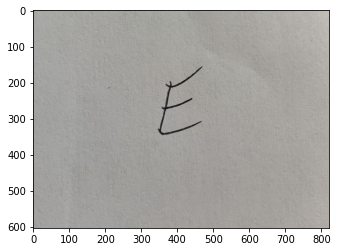

In [200]:
size = (28,28)
im = Image.open(training_images[0])
plt.imshow(im)

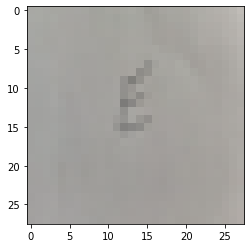

In [201]:
im = im.resize(size)
plt.imshow(im)

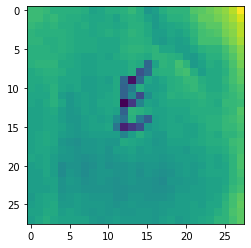

In [202]:
im = im.convert("L")
plt.imshow(im)

In [203]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential

In [204]:
im = np.array(im)
im

array([[168, 168, 167, 165, 165, 165, 165, 164, 161, 162, 164, 164, 165,
        167, 164, 158, 160, 164, 166, 166, 166, 171, 172, 174, 176, 178,
        182, 189],
       [168, 168, 166, 167, 165, 164, 164, 163, 162, 162, 163, 161, 164,
        165, 164, 161, 159, 162, 165, 165, 166, 169, 173, 173, 175, 177,
        180, 185],
       [167, 166, 165, 166, 164, 164, 163, 164, 162, 163, 163, 162, 163,
        165, 165, 163, 159, 161, 162, 163, 164, 167, 170, 172, 172, 176,
        178, 182],
       [166, 165, 165, 165, 165, 164, 163, 163, 162, 163, 164, 163, 164,
        166, 165, 163, 160, 160, 162, 161, 163, 166, 169, 170, 171, 175,
        177, 182],
       [166, 166, 164, 164, 165, 164, 163, 163, 163, 162, 162, 162, 164,
        165, 165, 164, 160, 159, 161, 160, 161, 165, 169, 169, 169, 173,
        176, 180],
       [165, 165, 165, 164, 165, 164, 163, 163, 163, 162, 162, 162, 165,
        166, 166, 165, 166, 162, 162, 160, 160, 162, 165, 166, 166, 169,
        173, 177],
       [16

In [205]:
print(im.shape)

(28, 28)


In [206]:
# load each image, run the initial conversion steps, combine in a list
new_images = []
new_size = (28,28)
for im in training_images:
  im = Image.open(im).convert("L").resize(new_size)
  new_images.append(np.array(im))

In [207]:
# "stack" the arrays
x_train_let = np.stack(new_images)
print(x_train_let.shape)

(25, 28, 28)


In [208]:
# as done in mnist add the color channel
x_train_let = x_train_let.reshape((25,28,28,1))
x_train_let.shape

(25, 28, 28, 1)

### Set up the Xtest

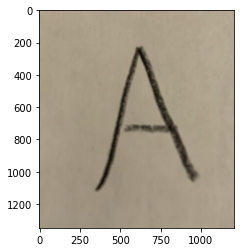

In [209]:
size = (28,28)
im = Image.open(testing_images[0])
plt.imshow(im)

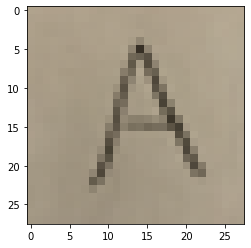

In [210]:
im = im.resize(size)
plt.imshow(im)

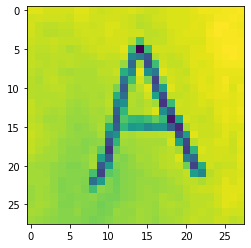

In [211]:
im = im.convert("L")
plt.imshow(im)

In [212]:
im = np.array(im)
im

array([[164, 164, 162, 162, 162, 162, 164, 164, 162, 160, 161, 162, 162,
        163, 162, 160, 160, 162, 163, 163, 163, 165, 167, 167, 167, 168,
        168, 169],
       [161, 162, 161, 161, 161, 160, 163, 163, 161, 161, 162, 162, 161,
        160, 158, 159, 161, 162, 163, 163, 163, 164, 165, 166, 168, 168,
        169, 168],
       [162, 159, 158, 158, 159, 159, 161, 161, 160, 161, 163, 163, 161,
        160, 157, 158, 160, 160, 163, 163, 163, 165, 164, 167, 170, 170,
        168, 167],
       [161, 159, 157, 157, 158, 158, 160, 161, 161, 161, 163, 162, 162,
        161, 161, 158, 158, 159, 162, 163, 164, 164, 164, 168, 170, 169,
        169, 168],
       [160, 159, 159, 160, 159, 159, 159, 160, 161, 160, 162, 162, 162,
        158, 135, 158, 159, 159, 162, 163, 163, 163, 163, 167, 168, 169,
        169, 169],
       [159, 158, 158, 159, 158, 155, 157, 159, 160, 161, 161, 161, 164,
        133,  48, 132, 162, 161, 161, 162, 162, 164, 164, 167, 168, 170,
        170, 169],
       [15

In [213]:
print(im.shape)

(28, 28)


In [214]:
# load each image, run the initial conversion steps, combine in a list
new_images = []
new_size = (28,28)
for im in testing_images:
  im = Image.open(im).convert("L").resize(new_size)
  new_images.append(np.array(im))

In [215]:
# "stack" the arrays
x_test_let = np.stack(new_images)
print(x_test_let.shape)

(5, 28, 28)


In [216]:
# as done in mnist add the color channel
x_test_let = x_test_let.reshape((5,28,28,1))
x_test_let.shape

(5, 28, 28, 1)

In [217]:
train_model(model,
            ((x_train_let, train_y_let)),
            (x_test_let, test_y_let), num_classes)

x_train shape: (25, 28, 28, 1)
25 train samples
5 test samples
Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 4.3586 - accuracy: 0.0000e+00 - val_loss: 4.2086 - val_accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 87ms/step - loss: 4.2908 - accuracy: 0.0000e+00 - val_loss: 4.2064 - val_accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 80ms/step - loss: 4.5502 - accuracy: 0.0000e+00 - val_loss: 4.2040 - val_accuracy: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 0s 85ms/step - loss: 4.4523 - accuracy: 0.0000e+00 - val_loss: 4.2018 - val_accuracy: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 83ms/step - loss: 4.4224 - accuracy: 0.0000e+00 - val_loss: 4.1994 - val_accuracy: 0.0000e+00
Training time: 0:00:01.463512
Test score: 4.199372291564941
Test accuracy: 0.0


# Stuart Method

In [218]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, Model

In [219]:
def plot_training_curves(history, title = None):
  '''Plot the training curves for loss and accuracy given a model history
  '''
  # find the minimum loss epoch
  minimum = np.min(history.history['val_loss'])
  min_loc = np.where(minimum == history.history['val_loss'])[0]
  # get the vline y-min and y-max
  loss_min, loss_max = (min(history.history['val_loss'] + history.history['loss']),
                        max(history.history['val_loss'] + history.history['loss']))
  acc_min, acc_max = (min(history.history['val_accuracy'] + history.history['accuracy']),
                      max(history.history['val_accuracy'] + history.history['accuracy']))
  # create figure
  fig, ax = plt.subplots(ncols = 2, figsize = (15, 7))
  fig.suptitle(title)
  index = np.arange(1, len(history.history['accuracy']) + 1)
  # plot the loss and validation loss
  ax[0].plot(index, history.history['loss'], label = 'loss')
  ax[0].plot(index, history.history['val_loss'], label = 'val_loss')
  ax[0].vlines(min_loc + 1, loss_min, loss_max, label = 'min_loss_location')
  ax[0].set_title('Loss')
  ax[0].set_ylabel('Loss')
  ax[0].set_xlabel('Epochs')
  ax[0].legend()
  # plot the accuracy and validation accuracy
  ax[1].plot(index, history.history['accuracy'], label = 'accuracy')
  ax[1].plot(index, history.history['val_accuracy'], label = 'val_accuracy')
  ax[1].vlines(min_loc + 1, acc_min, acc_max, label = 'min_loss_location')
  ax[1].set_title('Accuracy')
  ax[1].set_ylabel('Accuracy')
  ax[1].set_xlabel('Epochs')
  ax[1].legend()
  plt.show()

  

  

In [233]:
#reshape to add color channel
x_train = x_train.reshape(x_train.shape + (1,))
x_test = x_test.reshape(x_test.shape + (1,))
x_train_let = x_train_let.reshape(x_train_let.shape + (1,))
x_test_let = x_test_let.reshape(x_test_let.shape + (1,))

In [234]:
num_classes = 15
filters = 32
pool_size = 2
kernel_size = 3
dropout = 0.2
input_shape = (28,28,1)

model = Sequential([
      # convolutional feature extraction
      # ConvNet 1
      keras.layers.Conv2D(filters, kernel_size, padding = 'valid',
                          activation = 'relu',
                          input_shape = input_shape),
      keras.layers.MaxPooling2D(pool_size = pool_size),

      # ConvNet 2
      keras.layers.Conv2D(filters, kernel_size,
                          padding = 'valid',
                          activation = 'relu'),
      keras.layers.MaxPooling2D(pool_size = pool_size),

      # classification
      # will retrain from here
      keras.layers.Flatten(name = 'flatten'),

      keras.layers.Dropout(dropout),
      keras.layers.Dense(128, activation='relu'),

      keras.layers.Dropout(dropout, name='penult'),
      keras.layers.Dense(num_classes, activation = 'softmax', name = 'last')
  ])

es = keras.callbacks.EarlyStopping(min_delta=0.001, patience=2)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=32,
                    epochs=1000,
                    callbacks=[es])

Epoch 1/1000
1875/1875 [==============================] - 46s 24ms/step - loss: 1.7113 - accuracy: 0.8154 - val_loss: 0.0823 - val_accuracy: 0.9730
Epoch 2/1000
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1154 - accuracy: 0.9647 - val_loss: 0.0546 - val_accuracy: 0.9822
Epoch 3/1000
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0902 - accuracy: 0.9729 - val_loss: 0.0463 - val_accuracy: 0.9858
Epoch 4/1000
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0725 - accuracy: 0.9779 - val_loss: 0.0548 - val_accuracy: 0.9840
Epoch 5/1000
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0677 - accuracy: 0.9806 - val_loss: 0.0490 - val_accuracy: 0.9854


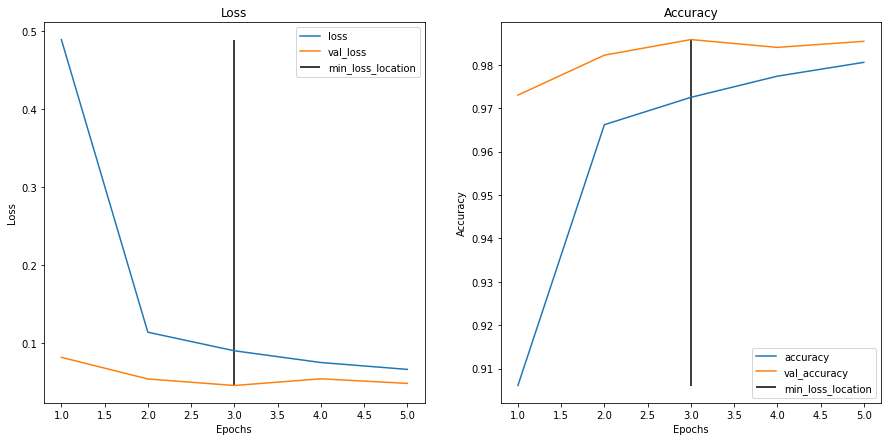

In [235]:
plot_training_curves(history=history)

In [236]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 800)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)              

In [237]:
model.layers[0]

## Transfer Learning Section

1. "Lock" the convulutional layers (set to non-trainable)
2. Remove original output layer, add new output layer with 3 neurons
3. Train classifier on new dataset

In [238]:
# lock the ConvNet layers
layer_trainable = False
for layer in model.layers:
  layer.trainable = layer_trainable
  if layer.name == 'flatten':
    layer_trainable = True

print(f"{'Layer Name':17} {'Is Trainable?'}")
for layer in model.layers:
  print(f"{layer.name:17} {layer.trainable}")

Layer Name        Is Trainable?
conv2d_16         False
max_pooling2d_11  False
conv2d_17         False
max_pooling2d_12  False
flatten           False
dropout_13        True
dense_13          True
penult            True
last              True


In [245]:
# get the penultimate layer of the model
penult_layer = model.get_layer(name = 'penult')

# create a new output layer
output_layer = keras.layers.Dense(15, activation= 'softmax')(penult_layer.output)

new_model = Model(model.input, output_layer)

In [246]:
new_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16_input (InputLayer) [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 800)               0   

In [247]:
new_model.compile(loss='sparse_categorical_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])

new_model_hist = new_model.fit(x_train_let, train_y_let,
                               validation_data=(x_test_let, test_y_let),
                               batch_size=32,
                               epochs=1000,
                               callbacks=[es])

Epoch 1/1000
1/1 [==============================] - 1s 688ms/step - loss: 2.7673 - accuracy: 0.1600 - val_loss: 2.5132 - val_accuracy: 0.2000
Epoch 2/1000
1/1 [==============================] - 0s 58ms/step - loss: 2.5161 - accuracy: 0.2400 - val_loss: 2.3560 - val_accuracy: 0.2000
Epoch 3/1000
1/1 [==============================] - 0s 55ms/step - loss: 2.3166 - accuracy: 0.0800 - val_loss: 2.2271 - val_accuracy: 0.2000
Epoch 4/1000
1/1 [==============================] - 0s 60ms/step - loss: 2.1744 - accuracy: 0.2400 - val_loss: 2.1114 - val_accuracy: 0.2000
Epoch 5/1000
1/1 [==============================] - 0s 63ms/step - loss: 2.1929 - accuracy: 0.2000 - val_loss: 2.0214 - val_accuracy: 0.2000
Epoch 6/1000
1/1 [==============================] - 0s 64ms/step - loss: 2.0913 - accuracy: 0.2000 - val_loss: 1.9548 - val_accuracy: 0.2000
Epoch 7/1000
1/1 [==============================] - 0s 59ms/step - loss: 2.1929 - accuracy: 0.2000 - val_loss: 1.9061 - val_accuracy: 0.2000
Epoch 8/1000

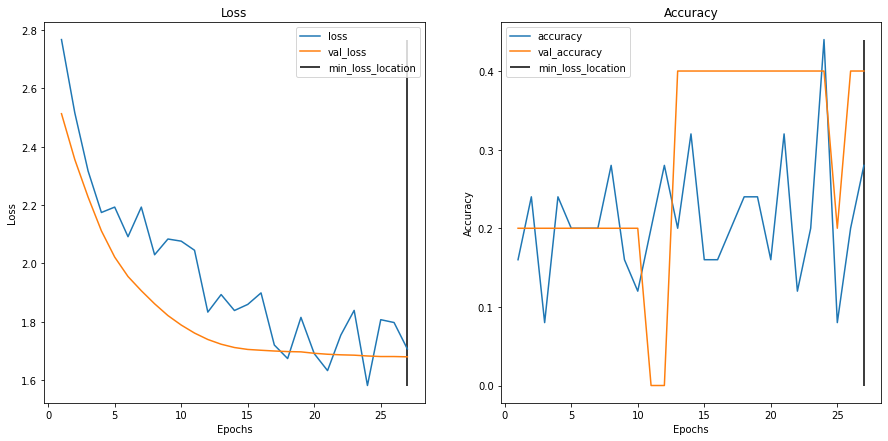

In [248]:
plot_training_curves(new_model_hist)